<a href="https://colab.research.google.com/github/samuelallam-dot/DataScienceandAI/blob/main/Sam_A_5_02_Modelling_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1xqQczl0FG-qtNA2_WQYuWePW9oU8irqJ)

# 5.02 Modelling Hackathon
We'll get a chance in this seminar to practice for the in-class test, and also to put what we have learned into practice.

To speed things up, I have done the data/feature engineering for you, you will just need to build it into a data science model. As before, you can use the code from [GitHub](https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI), from the internet, and/or use the Gemini AI tools.

This is an artificial dataset, and we will be predicting if students achieve a passing grade, which we will call anything above a "D".

We'll start by importing the data:

In [3]:
from google.colab import files
upload = files.upload()

Saving students_two.txt to students_two.txt


Now we will get the data into Pandas and inspect it:

In [5]:
import pandas as pd
df = pd.read_csv("students_two.txt")

df.head()

,Id,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Let's check for missing values:

In [6]:
df.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,1
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


Only one missing value. Let's just drop it out of laziness:

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,0
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


We have an ID column we know won't be predictive ... so let's drop it:

In [8]:
df = df.drop(["Id"], axis=1)
df.head()

,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Next we will convert some of the text features to numbers:

In [9]:
# High school
print(df['High_School_Type'].unique())

['Other' 'State' 'Private']


We can't easily convert these to a number range. Instead we should use one-hot encoding:

In [11]:
df = pd.get_dummies(df, columns=['High_School_Type'], drop_first=True, dtype=int)
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,No,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,Yes,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


We have converted this to two columns (on the far right) - "High_School_Type_Private" and "High_School_Type_State". We do not need the "Other" type as if the student is "Other" then both "Private" and "State" will be 0 (a unique combination). This is controlled by the command _drop\_first=True_. We also specify the data type (_dtype_) as __int__ so we return 0s and 1s rather than True and False.

Next we can look at Scholarship. It needs to be converted from a text representation of a percentage to a number:

In [10]:
df['Scholarship'] = df['Scholarship'].str.replace('%', '').astype(float) / 100
df.head()

,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Other,0.5,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Other,0.5,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,State,0.5,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Private,0.5,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Private,0.5,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


"Additional_Work" is next:

In [ ]:
# Additional work
print(df['Additional_Work'].unique())

['Yes' 'No']


Two values, so we can convert to 0 and 1:

In [12]:
df['Additional_Work'] = df['Additional_Work'].map({'Yes': 1, 'No': 0})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,1,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,0,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,1,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,0,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


Let's speed up now:

In [13]:
categorical_cols = ['Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']

for col in categorical_cols:
    print(f"Unique values for '{col}': {df[col].unique()}")

Unique values for 'Sports_activity': ['No' 'Yes']
Unique values for 'Transportation': ['Private' 'Bus']
Unique values for 'Attendance': ['Always' 'Never' 'Sometimes' '3']
Unique values for 'Reading': ['Yes' 'No']
Unique values for 'Notes': ['Yes' 'No' '6']
Unique values for 'Listening_in_Class': ['No' 'Yes' '6']
Unique values for 'Project_work': ['No' 'Yes']
Unique values for 'Grade': ['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


The values of '6' in 'Notes' and 'Listening_in_Class' make no sense, and neither do '3' for 'Attendance'. We'll be lazy and drop these rows (really we should check with an SME):

In [14]:
df = df[(df['Notes'] != '6') & (df['Listening_in_Class'] != '6') & (df['Attendance'] != '3')]
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,1,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,0,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,1,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,0,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


Now we can convert all those "Yes" / "No" columns to 0 and 1.

In [15]:
binary_cols = ['Sports_activity', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,Private,0,Always,1,1,0,0,AA,0,0
1,20,0.5,1,0,Private,0,Always,1,0,1,1,AA,0,0
2,21,0.5,0,0,Private,2,Never,0,0,0,1,AA,0,1
3,18,0.5,1,0,Bus,2,Always,0,1,0,0,AA,1,0
4,22,0.5,0,0,Bus,12,Always,1,0,1,1,AA,1,0


We can also do this with "Transportation":

In [16]:
df['Transportation'] = df['Transportation'].map({'Private': 1, 'Bus': 0})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,Always,1,1,0,0,AA,0,0
1,20,0.5,1,0,1,0,Always,1,0,1,1,AA,0,0
2,21,0.5,0,0,1,2,Never,0,0,0,1,AA,0,1
3,18,0.5,1,0,0,2,Always,0,1,0,0,AA,1,0
4,22,0.5,0,0,0,12,Always,1,0,1,1,AA,1,0


For Attendance an ordinal range makes sense:

In [17]:
df['Attendance'] = df['Attendance'].map({'Never': 0, 'Sometimes': 1, 'Always': 2})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,AA,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,AA,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,AA,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,AA,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,AA,1,0


This just leaves the target - 'Grade'. To make the problem binary we'll convert 'Fail' and any grade that includes a 'D' as 0 (for fail) and the rest as 1 (pass):

In [18]:
df['Grade'] = df['Grade'].apply(lambda x: 0 if x == 'Fail' or 'D' in x else 1)
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,1,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,1,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,1,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,1,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,1,1,0


The code has a new function `lambda`. A lambda function in Python is a small, anonymous function. It's defined using the `lambda` keyword and can take any number of arguments, but can only have one expression. The expression is evaluated and returned. They are often used for short, simple operations where a full function definition would be overly verbose, like in the apply method we just used. Although the function is new, the actual mechanics are quite simple. If the data is "Fail" or contains "D" return 0, and else return 1.

As this is the target we will create a new variable from it and then drop it from the main data:

In [19]:
Y_values = df[['Grade']].values.ravel() # change to list

Y_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1])

In [20]:
X_values = df.drop(['Grade'], axis=1)
X_values.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,1,0


We can now scale X:

In [21]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data and convert back to DataFrame
X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)
X_values

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State
0,0.375,0.333333,1.0,0.0,1.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.250,0.333333,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.375,0.333333,0.0,0.0,1.0,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000,0.333333,1.0,0.0,0.0,0.166667,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.500,0.333333,0.0,0.0,0.0,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.500,0.333333,1.0,1.0,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0
136,0.000,0.666667,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0
137,0.000,0.666667,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
138,0.500,0.666667,1.0,1.0,0.0,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,1.0


And now we can split into training and test:

In [22]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size = 0.2, random_state=1984, stratify=Y_values)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(112, 13)
(28, 13)
(112,)
(28,)


And now its time for modelling ...



Your turn :)


Modelling and Evaluation

Now that the data is fully prepared, scaled, and split into training and test sets, we can move on to modelling. Following the approach from earlier notebooks, I will start by comparing a baseline Logistic Regression model with tree-based ensemble methods to see whether the additional complexity provides meaningful improvements.

As before, I will evaluate performance using macro-averaged precision, recall, and F1-score, since the classes are not perfectly balanced and we care about performance on both outcomes (pass and fail).

Step 1: Train Baseline and Ensemble Models (Default Hyperparameters)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support
# initialise models
logr = LogisticRegression()
rf = RandomForestClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# train models
logr_model = logr.fit(X_train, Y_train)
rf_model = rf.fit(X_train, Y_train)
gbdt_model = gbdt.fit(X_train, Y_train)
xgb_model = xgb.fit(X_train, Y_train)

models = [logr_model, rf_model, gbdt_model, xgb_model]
names = ['Logistic Regression', 'Random Forest', 'GBDT', 'XGBDT']

# evaluate on training data
for i in range(len(models)):
    print(f"Model: {names[i]}")

    predict = models[i].predict(X_train)

    precision, recall, f1_score, _ = precision_recall_fscore_support(
        Y_train, predict, average='macro'
    )

    print(f"Macro Precision: {round(precision, 3)}")
    print(f"Macro Recall: {round(recall, 3)}")
    print(f"Macro F1-score: {round(f1_score, 3)}")
    print("\n")

Model: Logistic Regression
Macro Precision: 0.674
Macro Recall: 0.538
Macro F1-score: 0.509


Model: Random Forest
Macro Precision: 1.0
Macro Recall: 1.0
Macro F1-score: 1.0


Model: GBDT
Macro Precision: 0.994
Macro Recall: 0.983
Macro F1-score: 0.988


Model: XGBDT
Macro Precision: 0.994
Macro Recall: 0.983
Macro F1-score: 0.988




/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:02:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Initial Observations (Training Data)

Using the default hyperparameters, the initial results on the training data were as follows:

Logistic Regression performs relatively poorly, with a macro F1-score of just over 0.50. This suggests it struggles to capture the more complex relationships in the data, particularly for the minority (failing) class.

Random Forest achieves perfect precision, recall, and F1-score (1.0). While this looks impressive, such flawless performance on training data is a strong warning sign of overfitting, especially given the relatively small dataset.

GBDT and XGBDT both achieve very high but not perfect scores (macro F1 ≈ 0.99). This suggests they are learning the structure of the data extremely well, while still introducing some regularisation through boosting.

At this stage, although Random Forest appears to be the “best” model numerically, its perfect score is suspicious. In contrast, GBDT and XGBDT show near-perfect performance without hitting absolute 1.0, which is often a healthier sign in practice.

As in previous notebooks, these training scores alone are not sufficient to choose a final model. The key question is how well each model generalises to unseen data, so the next step is to evaluate performance on the test set.

# Step 2: Evaluation on Test Data

In [24]:
for i in range(len(models)):
    print(f"Model: {names[i]}")

    predict = models[i].predict(X_test)

    precision, recall, f1_score, _ = precision_recall_fscore_support(
        Y_test, predict, average='macro'
    )

    print(f"Macro Precision: {round(precision, 3)}")
    print(f"Macro Recall: {round(recall, 3)}")
    print(f"Macro F1-score: {round(f1_score, 3)}")
    print("\n")

Model: Logistic Regression
Macro Precision: 0.547
Macro Recall: 0.524
Macro F1-score: 0.513


Model: Random Forest
Macro Precision: 0.36
Macro Recall: 0.429
Macro F1-score: 0.391


Model: GBDT
Macro Precision: 0.588
Macro Recall: 0.595
Macro F1-score: 0.59


Model: XGBDT
Macro Precision: 0.447
Macro Recall: 0.452
Macro F1-score: 0.449




Test Data Performance and Interpretation

We now evaluate each model on the test data, which provides a much more realistic assessment of how well the models generalise to unseen students.

Logistic Regression

Logistic Regression achieves a macro F1-score of 0.51, with precision and recall both just above 0.52. While this is not a strong result, it is relatively stable compared to the more complex models. The similar values for precision and recall suggest that Logistic Regression is making fairly balanced errors across both classes, but it lacks the expressive power to model more complex interactions between features. Overall, it acts as a reasonable but weak baseline.

Random Forest

Random Forest performs very poorly on the test data, with a macro F1-score of 0.39. This represents a dramatic collapse from its perfect training performance and is clear evidence of severe overfitting. The low precision indicates that many predicted passes are incorrect, while the low recall suggests it also fails to correctly identify a large proportion of actual passes. This confirms the earlier suspicion that the model memorised the training data rather than learning generalisable patterns.

Gradient Boosting Decision Trees (GBDT)

GBDT delivers the best overall performance on the test set, with a macro F1-score of 0.59, and both precision and recall close to 0.60. Importantly, these metrics are well balanced, indicating that the model performs consistently across both the pass and fail classes. Compared to Logistic Regression, GBDT clearly captures more structure in the data, while avoiding the extreme overfitting seen in Random Forest.

XGBoost (XGBDT)

XGBDT performs worse than expected, with a macro F1-score of 0.45. Despite its strong training performance, the drop on test data suggests that the model is still overfitting, likely due to the small dataset size and the model’s higher complexity. This highlights that more sophisticated algorithms do not automatically lead to better results, particularly when data is limited.

Overall Conclusion

The test results make it clear that training performance alone is misleading. Although Random Forest and XGBDT appeared excellent on the training data, both fail to generalise effectively.

GBDT emerges as the strongest model overall, achieving the highest macro F1-score on the test set with balanced precision and recall. This makes it the most reliable choice for this task, particularly given the importance of treating both pass and fail outcomes fairly.

This reinforces a key lesson in applied machine learning:

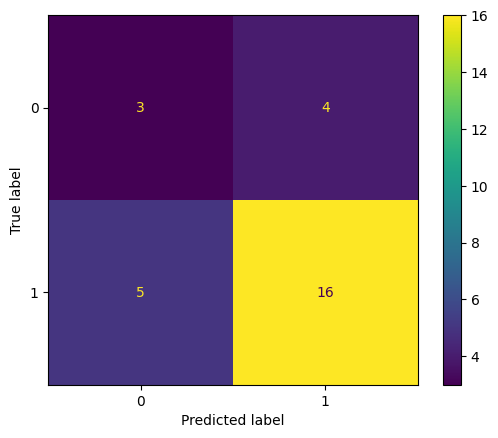

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

predict = gbdt_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test, predict)